Let's look at a sample of $W$ boson candidates, particularly those that decay to an electron $e$ and a neutrino $\nu$. A selection has already been performed on the SingleElectron sample collected by the CMS Experiment in 2011. 

(All selections contained in this notebook come from those specified and described in "Measurement of the Inclusive W and Z Production Cross Sections in pp Collisions at $\sqrt{s}$ = 7 TeV" by the CMS Collaboration [arXiv:1107.4789].)

An event is kept if there is one electron in the event with $p_{t}$ > 25.0 GeV. The event is rejected if there is a second electron present with $p_{t}$ > 20 GeV.

We output the following information to a csv (comma-separated-variable) file:

Run,Event,pt,eta,phi,Q,type,delEta,delPhi,sigmaEtaEta,HoverE,isoTrack,isoEcal,isoHcal,MET,phiMET

Where
* Run, Event are the run and event numbers, respectively
* pt is the transverse momentum $p_{t}$ of the electron
* eta is the pseudorapidity of the electron: $\eta$
* phi is the $\phi$ angle of the electron direction
* Q is the charge of the electron
* type is either EB or EE: whether the electron is in the barrel or in the endcap
* delEta is the difference in $\eta$ between the track and the cluster: $\Delta\eta$
* delPhi is the difference in $\phi$ between the track and the cluster: $\Delta\phi$
* sigmaEtaEta is the weighted cluster rms along $\eta$: $\sigma_{\eta\eta}$
* HoverE is the HCAL energy / ECAL energy
* isoTrack is the isolation variable for tracks
* isoEcal is the isolation variable for the ECAL
* isoHcal is the isolation variable for the HCAL
* MET is the missing transverse energy
* phiMET is the $\phi$ angle of the MET

Let's read in the csv file and calculate the transverse mass $M_{T}$, where 

$M_{T} = \sqrt{2p_{t}MET(1 - \cos{\Delta\phi})}$

and make a histogram of the results.

We will first load the csv file into a pandas data frame and add a column with $M_{T}$:

In [28]:
import math
import numpy as np
import pandas as pd

df = pd.read_csv('./data/Wenu_Run2011A.csv')
df['Mt'] = np.sqrt(2*df['pt']*df['MET']*(1-np.cos(df['phi']-df['phiMET'])))

df.head()

,Run,Event,pt,eta,phi,Q,type,delEta,delPhi,sigmaEtaEta,HoverE,isoTrack,isoEcal,isoHcal,MET,phiMET,Mt
0,167676,328843401,38.6387,-0.849901,1.84857,-1,EB,0,0,0.009485,0.000000,0.000000,1.224090,0.000000,46.78840,-1.388570,84.940450
1,167676,328836311,59.1666,-2.109460,-2.51630,1,EE,0,0,0.021378,0.017705,20.477100,2.544120,6.744960,15.01790,1.150270,57.575320
2,167676,328915343,31.7262,2.450360,2.89560,1,EE,0,0,0.028839,0.000000,0.777484,1.822170,0.366293,20.65500,-0.270273,51.194065
3,167676,328884653,73.4109,-1.395090,2.00521,-1,EB,0,0,0.010006,0.000000,22.858400,8.015060,8.295060,3.28583,-0.773930,30.553549
4,167676,328970109,49.1363,-2.432580,3.02186,1,EE,0,0,0.027103,0.000000,0.000000,0.115398,0.000000,3.14248,2.508130,6.313731


Then make a histogram of the transverse mass:

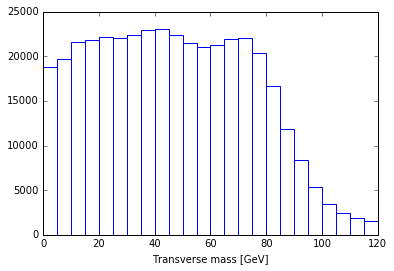

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt

MT_hist = np.histogram(df['Mt'], bins=24, range=(0,120))

hist, bins = MT_hist
width = 1.0*(bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width, color='w', linewidth=1, edgecolor='b')
plt.xlabel('Transverse mass [GeV]')
plt.show()


How do the various selections affect the distibution of the transverse mass?

Let's take a look at the distribution of $\sigma_{\eta\eta}$ for EB and EE:

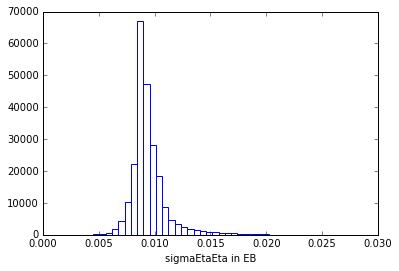

In [30]:
eb = df[df.type == 'EB']

seeEB_hist = np.histogram(eb['sigmaEtaEta'], bins=50)

hist, bins = seeEB_hist
width = 1.0*(bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width, color='w', linewidth=1, edgecolor='b')
plt.xlabel('sigmaEtaEta in EB')
plt.show()

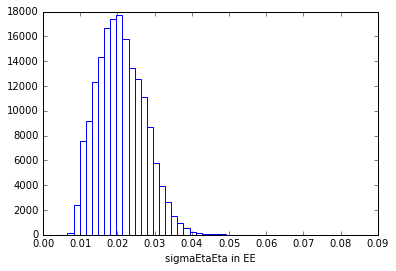

In [31]:
ee = df[df.type == 'EE']

seeEE_hist = np.histogram(ee['sigmaEtaEta'], bins=50)

hist, bins = seeEE_hist
width = 1.0*(bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width, color='w', linewidth=1, edgecolor='b')
plt.xlabel('sigmaEtaEta in EE')
plt.show()

If we apply a so-called "tight" selection using the selection variables this means that the following conditions must be satisfied (NOTE: check these):

for EB
* $\Delta\eta$ < 0.005
* $\Delta\phi$ < 0.06
* $\sigma_{\eta\eta}$ < 0.01
* H/E < 0.05

for EE
* $\Delta\eta$ < 0.007
* $\Delta\phi$ < 0.03
* $\sigma_{\eta\eta}$ < 0.03
* H/E < 0.03

Furthermore, the isolation variable requirements are:

for EB
* isoTrack / $E_{T}$ < 0.1
* isoEcal / $E_{T}$ < 0.1
* isoHcal / $E_{T}$ < 0.1

for EE
* isoTrack / $E_{T}$ < 0.04
* isoEcal / $E_{T}$ < 0.06
* isoHcal / $E_{T}$ < 0.03


Let's apply a selection using $\sigma_{\eta\eta}$ and see what the transverse mass looks like:

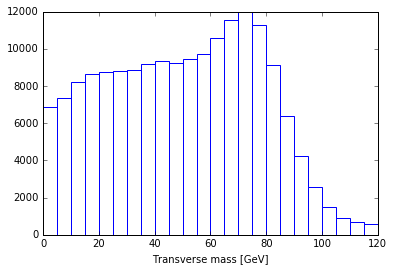

In [39]:
mt = eb[eb.sigmaEtaEta < 0.01]

MT_hist = np.histogram(mt['Mt'], bins=24, range=(0,120))

hist, bins = MT_hist
width = 1.0*(bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width, color='w', linewidth=1, edgecolor='b')
plt.xlabel('Transverse mass [GeV]')
plt.show()


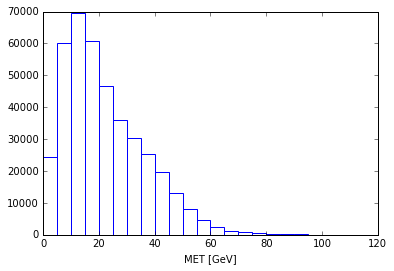

In [35]:
MET_hist = np.histogram(df['MET'], bins=24, range=(0,120))

hist, bins = MET_hist
width = 1.0*(bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width, color='w', linewidth=1, edgecolor='b')
plt.xlabel('MET [GeV]')
plt.show()
